# Fraud Detection System
- This project aims to develop an effectve fraud detection system for Fastag transactions using machine learning classification techniques.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("C:/Users/admin/Desktop/Mentorness/Project 1- Fast tag fraud detection/FastagFraudDetection.csv")

In [3]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,01-06-2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,01-07-2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,01-08-2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,01-09-2023 02:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,01-10-2023 06:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,01-01-2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,02-05-2023 05:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [4]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,01-06-2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,01-07-2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,01-08-2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,01-09-2023 02:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,01-10-2023 06:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [5]:
df.tail()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4995,4996,01-01-2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,02-05-2023 05:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud
4999,5000,03-10-2023 00:59,Bus,FTG-459-WSX-543,C-103,Regular,Large,330,125,"13.21331620748757, 77.55413526894684",86,KA37AB3456,Fraud


In [6]:
df.shape

(5000, 13)

In [7]:
df.size

65000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [9]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [10]:
#Checking null values
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [11]:
#Checking the distribution of the target variable 
df.Fraud_indicator.value_counts()

Not Fraud    4017
Fraud         983
Name: Fraud_indicator, dtype: int64

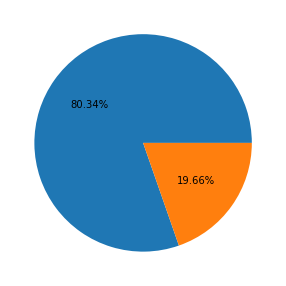

In [12]:
# pie plot 
plt.figure(figsize=(5,5))
plt.pie((df['Fraud_indicator'].value_counts()), autopct = '%.2f%%')
plt.show()

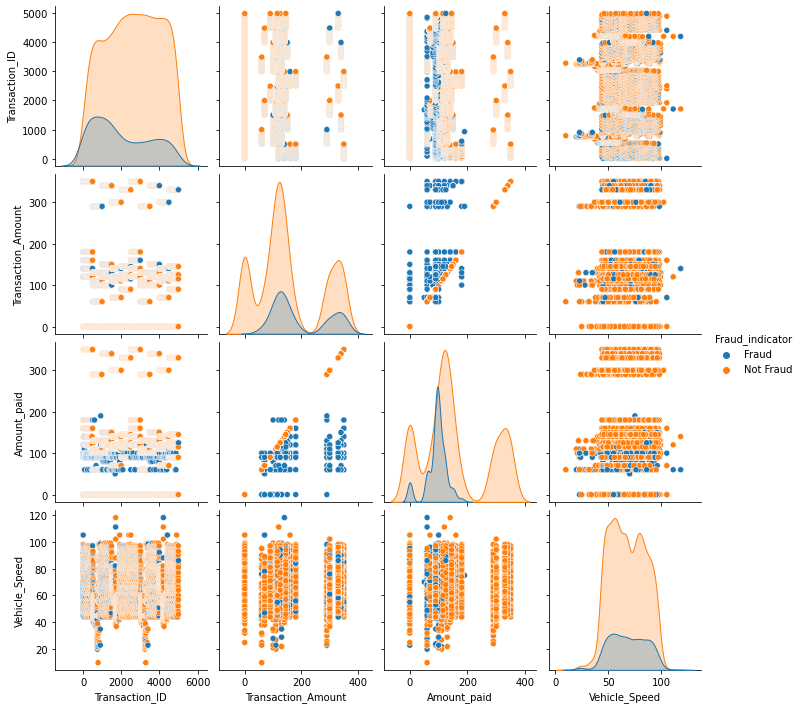

In [13]:
# Explore relationships between features
sns.pairplot(df, hue = 'Fraud_indicator')
plt.show()

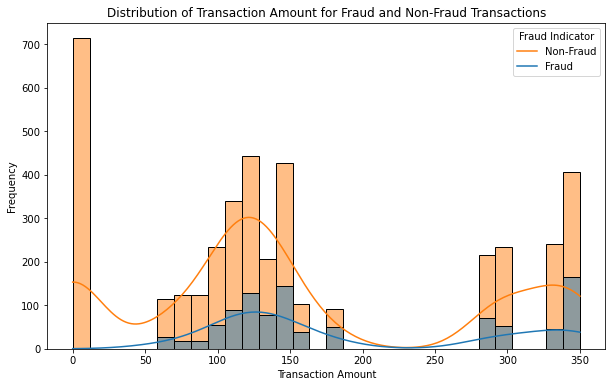

In [14]:
# Visualize the distribution of transaction amount for fraud and non-fraud transaction
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Transaction_Amount', hue='Fraud_indicator', kde=True, bins=30)
plt.title('Distribution of Transaction Amount for Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(title='Fraud Indicator', labels=['Non-Fraud', 'Fraud'])
plt.show()

In [15]:
#Drop unneccessary columns
col_drop = ['Timestamp', 'Geographical_Location','TollBoothID','FastagID','Vehicle_Plate_Number']
df = df.drop(columns=col_drop)
df

,Transaction_ID,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator
0,1,Bus,Express,Large,350,120,65,Fraud
1,2,Car,Regular,Small,120,100,78,Fraud
2,3,Motorcycle,Regular,Small,0,0,53,Not Fraud
3,4,Truck,Regular,Large,350,120,92,Fraud
4,5,Van,Express,Medium,140,100,60,Fraud
...,...,...,...,...,...,...,...,...
4995,4996,Truck,Regular,Large,330,330,81,Not Fraud
4996,4997,Van,Express,Medium,125,125,64,Not Fraud
4997,4998,Sedan,Regular,Medium,115,115,93,Not Fraud
4998,4999,SUV,Express,Large,145,145,57,Not Fraud


In [16]:
print(df.columns)

Index(['Transaction_ID', 'Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions',
       'Transaction_Amount', 'Amount_paid', 'Vehicle_Speed',
       'Fraud_indicator'],
      dtype='object')


In [17]:
numerical_columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

In [18]:
categorical_columns = ['Vehicle_Type', 'Lane_Type','Vehicle_Dimensions', 'Fraud_indicator']

In [19]:
# encode categorical columns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [20]:
df.head()

,Transaction_ID,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator
0,1,0,0,0,350,120,65,0
1,2,1,1,2,120,100,78,0
2,3,2,1,2,0,0,53,1
3,4,5,1,0,350,120,92,0
4,5,6,0,1,140,100,60,0


In [21]:
X = df.drop(['Fraud_indicator'], axis=1)
Y = df['Fraud_indicator']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, Y_train)

LogisticRegression()

In [25]:
y_pred_train_lr = lr.predict(X_train_scaled)

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 

In [28]:
accuracy = accuracy_score(Y_train, y_pred_train_lr)
precision = precision_score(Y_train, y_pred_train_lr)
recall = recall_score(Y_train, y_pred_train_lr)
f1 = f1_score(Y_train, y_pred_train_lr)

print("Accuracy, Precision, Recall and F1 Score for Training data in Logistic Regression: ")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy, Precision, Recall and F1 Score for Training data in Logistic Regression: 
Accuracy: 0.96
Precision: 0.95
Recall: 1.00
F1 Score: 0.98


In [29]:
y_pred_test_lr = lr.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred_test_lr)
precision = precision_score(Y_test, y_pred_test_lr)
recall = recall_score(Y_test, y_pred_test_lr)
f1 = f1_score(Y_test, y_pred_test_lr)

print("Accuracy, Precision, Recall and F1 Score for Testing data in Logistic Regression: ")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy, Precision, Recall and F1 Score for Testing data in Logistic Regression: 
Accuracy: 0.96
Precision: 0.96
Recall: 1.00
F1 Score: 0.98


# Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train_scaled, Y_train)

y_pred_train_dt = dt.predict(X_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [31]:
accuracy = accuracy_score(Y_train, y_pred_train_dt)
precision = precision_score(Y_train, y_pred_train_dt)
recall = recall_score(Y_train, y_pred_train_dt)
f1 = f1_score(Y_train, y_pred_train_dt)

print("Accuracy, Precision, Recall and F1 Score for Training data in Decision Tree Classifier: ")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy, Precision, Recall and F1 Score for Training data in Decision Tree Classifier: 
Accuracy: 0.82
Precision: 0.82
Recall: 1.00
F1 Score: 0.90


In [32]:
y_pred_test_dt = dt.predict(X_test_scaled)

accuracy = accuracy_score(Y_test,y_pred_test_dt)
precision = precision_score(Y_test, y_pred_test_dt)
recall = recall_score(Y_test, y_pred_test_dt)
f1 = f1_score(Y_test, y_pred_test_dt)

print("Accuracy, Precision, Recall and F1 Score for Testing data in Decision Tree Classifier: ")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy, Precision, Recall and F1 Score for Testing data in Decision Tree Classifier: 
Accuracy: 0.94
Precision: 0.93
Recall: 1.00
F1 Score: 0.97


# K- Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [34]:
knn.fit(X_train_scaled, Y_train)

y_pred_train_knn = knn.predict(X_train_scaled)

In [35]:
accuracy = accuracy_score(Y_train, y_pred_train_knn)
precision = precision_score(Y_train, y_pred_train_knn)
recall = recall_score(Y_train, y_pred_train_knn)
f1 = f1_score(Y_train, y_pred_train_knn)

print("Accuracy, Precision, Recall and F1 Score for Training data in K- Nearest Neighbors: ")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy, Precision, Recall and F1 Score for Training data in K- Nearest Neighbors: 
Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1 Score: 0.97


In [36]:
y_pred_test_knn = knn.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred_test_knn)
precision = precision_score(Y_test, y_pred_test_knn)
recall = recall_score(Y_test, y_pred_test_knn)
f1 = f1_score(Y_test, y_pred_test_knn)

print("Accuracy, Precision, Recall and F1 Score for Testing data in K- Nearest Neighbors: ")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy, Precision, Recall and F1 Score for Testing data in K- Nearest Neighbors: 
Accuracy: 0.92
Precision: 0.91
Recall: 1.00
F1 Score: 0.95


# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred_train_rfc = rfc.predict(X_train_scaled)

In [39]:
accuracy = accuracy_score(Y_train, y_pred_train_rfc)
precision = precision_score(Y_train, y_pred_train_rfc)
recall = recall_score(Y_train, y_pred_train_rfc)
f1 = f1_score(Y_train, y_pred_train_rfc)

print("Accuracy, Precision, Recall and F1 Score for Training data in Random Forest Classifier: ")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy, Precision, Recall and F1 Score for Training data in Random Forest Classifier: 
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [40]:
y_pred_test_rfc = rfc.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred_test_rfc)
precision = precision_score(Y_test, y_pred_test_rfc)
recall = recall_score(Y_test, y_pred_test_rfc)
f1 = f1_score(Y_test, y_pred_test_rfc)

print("Accuracy, Precision, Recall and F1 Score for Testing data in Random Forest Classifier: ")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy, Precision, Recall and F1 Score for Testing data in Random Forest Classifier: 
Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 1.00


In [41]:
# model deployment
input_data = (3,2,1,2,0,0,53)

#chage into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array
reshaped_data = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(reshaped_data)
print(prediction)

if prediction == 0:
    print("Fraud Transaction")
else:
    print("Non-Fraud Transaction")

[1]
Non-Fraud Transaction


## Thank You !!!